In [ ]:
import pandas as pd

In [ ]:
Fraud=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [ ]:
Fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
Fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,14247.000000,1.424700e+04,1.424600e+04,1.424600e+04,1.424600e+04,1.424600e+04,14246.000000,14246.0
mean,5.037131,1.118848e+05,7.937369e+05,8.107136e+05,8.411336e+05,1.147629e+06,0.005475,0.0
std,2.463112,2.805152e+05,2.016693e+06,2.059984e+06,2.528174e+06,3.151706e+06,0.073794,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,2.000000,4.585130e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,6.000000,1.286936e+04,2.041500e+04,8.216325e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.218917e+05,1.384956e+05,1.294173e+05,2.641427e+05,2.775150e+05,0.000000,0.0
max,8.000000,1.000000e+07,1.293042e+07,1.301050e+07,2.093759e+07,2.533027e+07,1.000000,0.0


In [ ]:
Fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
Fraud.dropna(axis=1)

,step,type,amount,nameOrig
0,1,PAYMENT,9839.64,C1231006815
1,1,PAYMENT,1864.28,C1666544295
2,1,TRANSFER,181.00,C1305486145
3,1,CASH_OUT,181.00,C840083671
4,1,PAYMENT,11668.14,C2048537720
...,...,...,...,...
14242,8,PAYMENT,20924.47,C1540995845
14243,8,CASH_OUT,75244.54,C1827218030
14244,8,PAYMENT,3074.36,C1632817923
14245,8,PAYMENT,11465.21,C1837637612


In [ ]:
Fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
Fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
X=Fraud[['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]

In [ ]:
y=Fraud['isFraud']

In [ ]:
X.shape

(14247, 9)

In [ ]:
y.shape

(14247,)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
type_counts = Fraud['type'].value_counts()

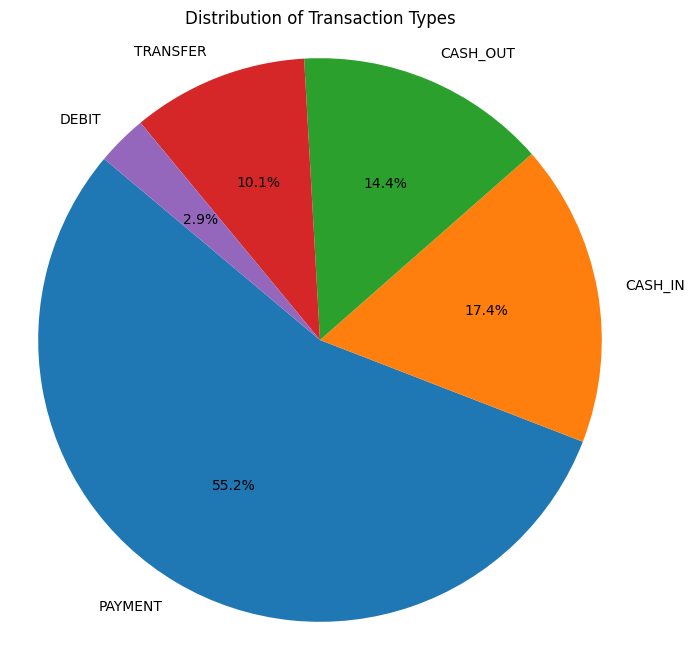

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transaction Types')
plt.axis('equal')
plt.show()

In [ ]:
fraud_counts = Fraud['isFraud'].value_counts()

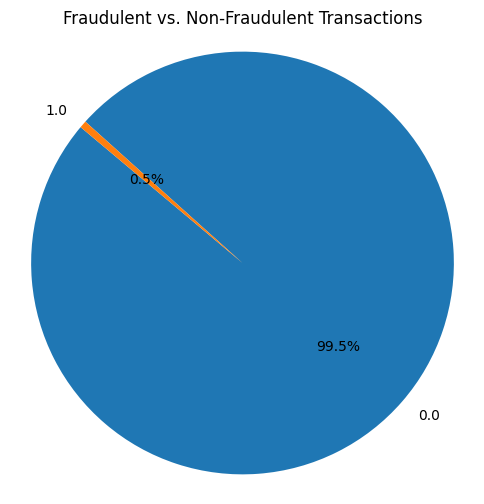

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2529)

In [ ]:
X_train.shape

(11397, 9)

In [ ]:
X_test.shape

(2850, 9)

In [ ]:
y_train.shape

(11397,)

In [ ]:
y_test.shape

(2850,)

In [ ]:
print(X_train.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
dtype: object


In [ ]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")

Categorical features: ['type', 'nameOrig', 'nameDest']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorical_features:
    X_train[feature] = le.fit_transform(X_train[feature])

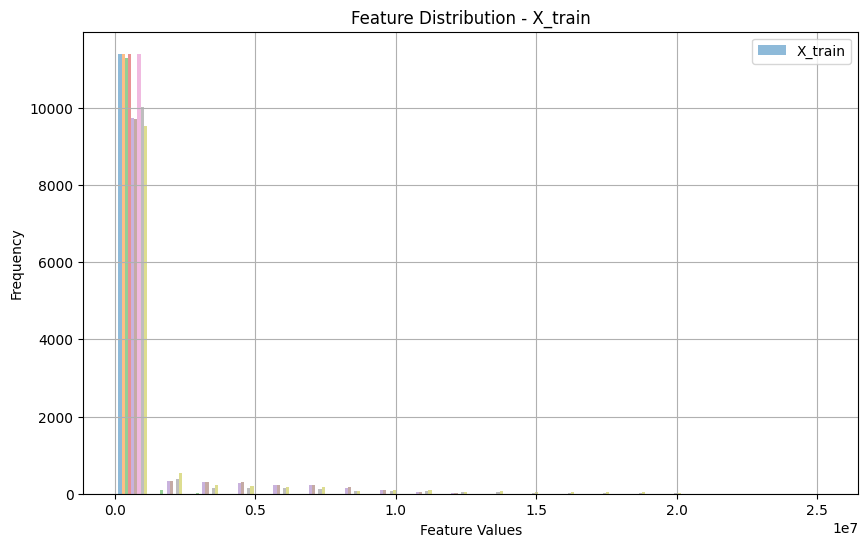

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(X_train.values, bins=20, alpha=0.5, label='X_train')
plt.title('Feature Distribution - X_train')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
categorical_features = X_test.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")

Categorical features: ['type', 'nameOrig', 'nameDest']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorical_features:
    X_test[feature] = le.fit_transform(X_test[feature])

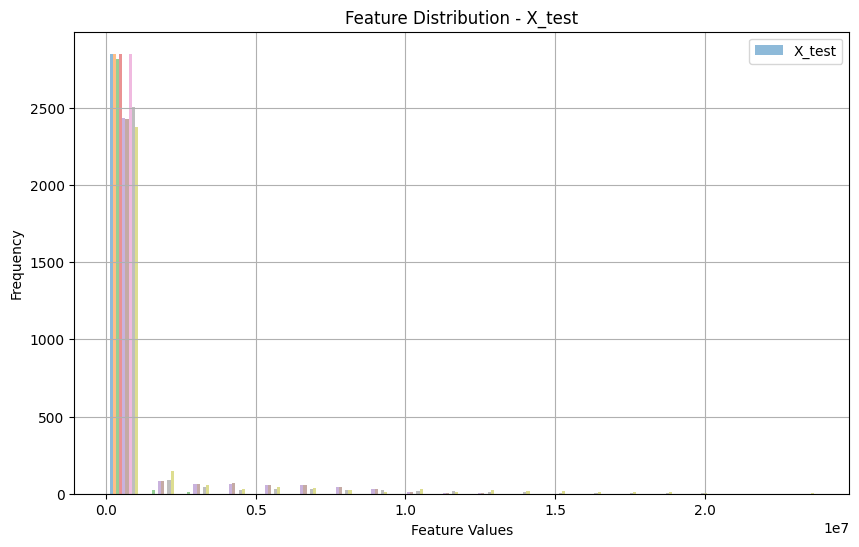

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(X_test.values, bins=20, alpha=0.5, label='X_test')
plt.title('Feature Distribution - X_test')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

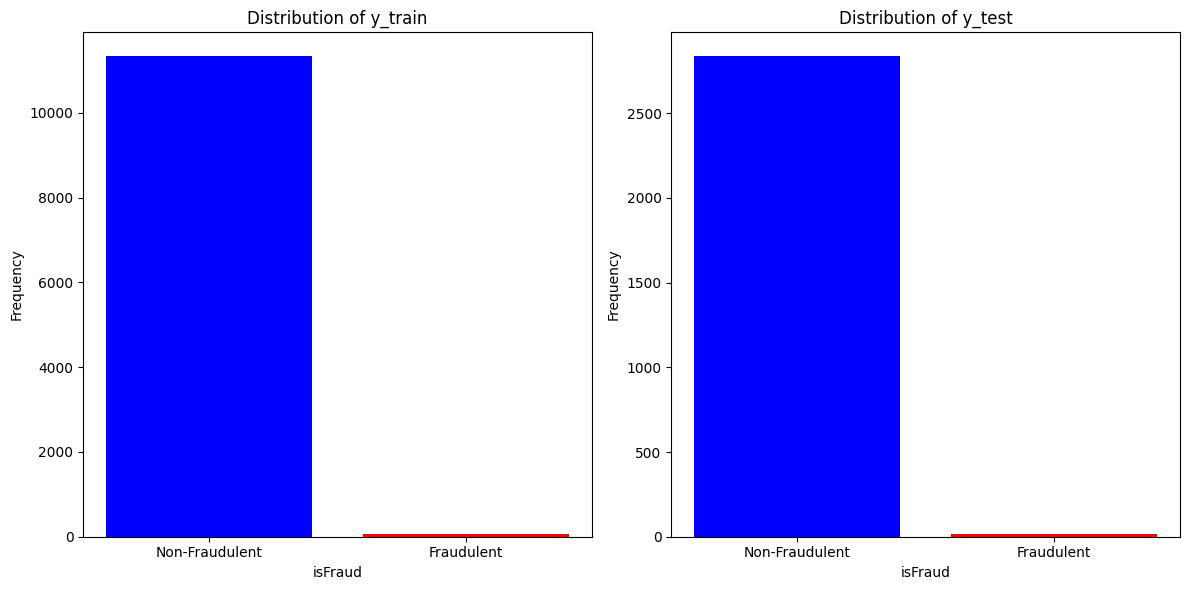

In [ ]:
import matplotlib.pyplot as plt

y_train_counts = y_train.value_counts()

y_test_counts = y_test.value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(y_train_counts.index, y_train_counts.values, color=['blue', 'red'])
ax1.set_title('Distribution of y_train')
ax1.set_xlabel('isFraud')
ax1.set_ylabel('Frequency')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

ax2.bar(y_test_counts.index, y_test_counts.values, color=['blue', 'red'])
ax2.set_title('Distribution of y_test')
ax2.set_xlabel('isFraud')
ax2.set_ylabel('Frequency')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

plt.tight_layout()
plt.show()


In [ ]:
print(y_train.isnull().sum())

1


In [ ]:
y_train = y_train.dropna()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
y_train = y_train.values.reshape(-1, 1)

In [ ]:
imputer.fit(y_train)

SimpleImputer()

In [ ]:
print(y_train.shape)

(11396, 1)


In [ ]:
print(y_train)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
import numpy as np

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [ ]:
missing_values_X = X_train.isna().sum()
missing_values_y = y_train.isna().sum()

print("Missing values in X_train:", missing_values_X)
print("Missing values in y_train:", missing_values_y)

Missing values in X_train: step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          0
oldbalanceDest    1
newbalanceDest    1
dtype: int64
Missing values in y_train: 0    0
dtype: int64


In [ ]:
if len(np.where(np.isnan(y_train))[0]) > 0:
    missing_index = np.where(np.isnan(y_train))[0][0]
    X_train = np.delete(X_train, missing_index, axis=0)
    LR.fit(X_train, y_train)
else:
    print("y_train has no missing values.")

y_train has no missing values.


In [ ]:
print(X_train.shape)
print(y_train.shape)

(11397, 9)
(11396, 1)


In [ ]:
if X_train.shape[0] > y_train.shape[0]:
    X_train = X_train[:-1]
elif y_train.shape[0] > X_train.shape[0]:
    y_train = y_train[:-1]

In [ ]:
if X_train.shape[0] < y_train.shape[0]:
    X_train = np.append(X_train, np.zeros((1, X_train.shape[1])), axis=0)
elif y_train.shape[0] < X_train.shape[0]:
    y_train = np.append(y_train, 0)

In [ ]:
if X_train.shape[0] != y_train.shape[0]:
    X_train, y_train = load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)

(11396, 9)
(11396, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR

LogisticRegression()

In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          0
oldbalanceDest    1
newbalanceDest    1
dtype: int64
0    0
dtype: int64


In [ ]:
!pip install sklearn.impute
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

ERROR: Could not find a version that satisfies the requirement sklearn.impute (from versions: none)
ERROR: No matching distribution found for sklearn.impute


In [ ]:
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
LR.intercept_

array([-5.5156852e-07])

In [ ]:
LR.coef_

array([[-2.74521830e-06, -1.34744976e-06, -1.76580355e-05,
        -3.47825525e-04,  1.93555688e-05, -1.96512904e-05,
        -1.47307237e-03,  6.72179555e-07, -8.10510072e-07]])

In [ ]:
y_pred=LR.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.9936842105263158

In [ ]:
from sklearn.svm import SVC
SVM=SVC()
SVM

SVC()

In [ ]:
SVM.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
SVC()

SVC()

In [ ]:
y_pred=SVM.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.9947368421052631

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF

RandomForestClassifier()

In [ ]:
RF.fit(X_train,y_train)
RF


<ipython-input-65-f28f90533b2f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
y_pred=RF.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
CM=confusion_matrix(y_test,y_pred)
CM

array([[2835,    0],
       [   9,    6]])

In [ ]:
Classification=classification_report(y_test,y_pred)
Classification

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      2835\n         1.0       1.00      0.40      0.57        15\n\n    accuracy                           1.00      2850\n   macro avg       1.00      0.70      0.78      2850\nweighted avg       1.00      1.00      1.00      2850\n'

In [ ]:
Accurcay=accuracy_score(y_pred,y_test)
Accuracy

0.9947368421052631

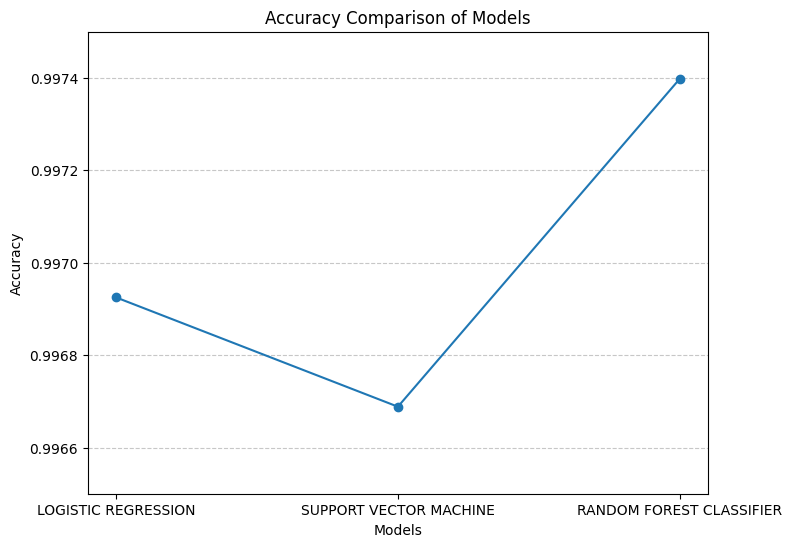

In [ ]:
import matplotlib.pyplot as plt
models = ['LOGISTIC REGRESSION', 'SUPPORT VECTOR MACHINE', 'RANDOM FOREST CLASSIFIER']
accuracy_scores = [0.9969248965109403, 0.9966883500887049, 0.997397989355411]
plt.figure(figsize=(8, 6))
plt.plot(models, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0.9965, 0.9975)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
new=[[0,0,0,1,181.00,181.0,0.00,21182.0,0.0]]

In [ ]:
new_pred=RF.predict(new)
new_pred

array([0.])

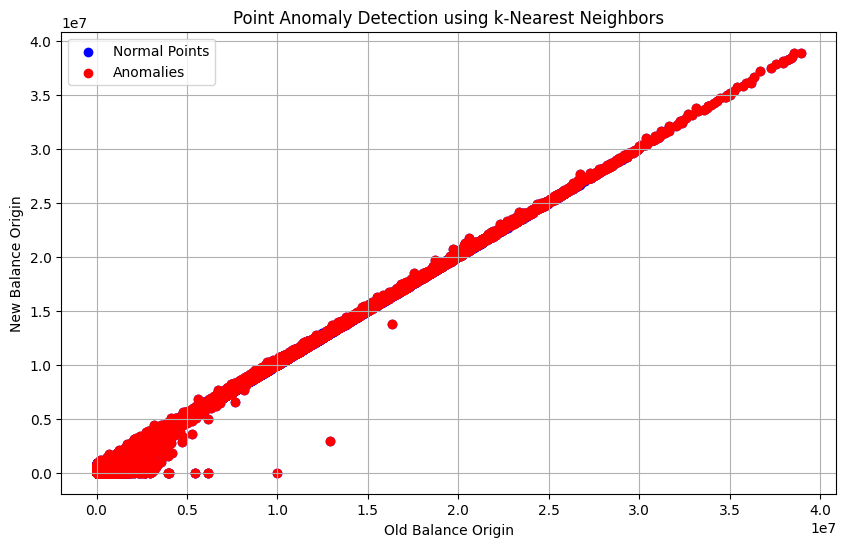

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Load your dataset
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
data.dropna()

# Select relevant features for anomaly detection
X = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
X=X.dropna()

# Fit the k-nearest neighbors model
k = 5  # Adjust k as needed
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nbrs.kneighbors(X)

# Compute the average distance to the k nearest neighbors
avg_distances = np.mean(distances, axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(avg_distances, 95)  # Adjust threshold as needed

# Identify anomalies based on the threshold
anomalies = X[avg_distances > threshold]

# Visualize the anomalies
plt.figure(figsize=(10, 6))

# Plot the points
plt.scatter(X['oldbalanceOrg'], X['newbalanceOrig'], color='blue', label='Normal Points')

# Mark anomalies in red
plt.scatter(anomalies['oldbalanceOrg'], anomalies['newbalanceOrig'], color='red', label='Anomalies')

plt.title('Point Anomaly Detection using k-Nearest Neighbors')
plt.xlabel('Old Balance Origin')
plt.ylabel('New Balance Origin')
plt.legend()
plt.grid(True)
plt.show()


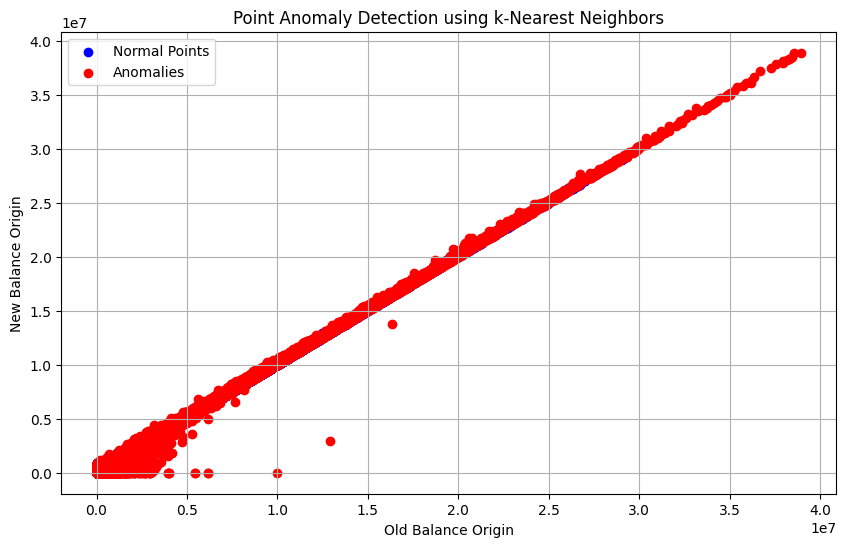

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Load your dataset
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
data.dropna(inplace=True)

# Select relevant features for anomaly detection
X = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Fit the k-nearest neighbors model
k = 5  # Adjust k as needed
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nbrs.kneighbors(X)

# Compute the average distance to the k nearest neighbors
avg_distances = np.mean(distances, axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(avg_distances, 95)  # Adjust threshold as needed

# Identify anomalies based on the threshold
anomalies = X[avg_distances > threshold]
normal_points = X[avg_distances <= threshold]  # Normal points

# Visualize the anomalies and normal points
plt.figure(figsize=(10, 6))

# Plot the normal points
plt.scatter(normal_points['oldbalanceOrg'], normal_points['newbalanceOrig'], color='blue', label='Normal Points')

# Plot the anomalies in red
plt.scatter(anomalies['oldbalanceOrg'], anomalies['newbalanceOrig'], color='red', label='Anomalies')

plt.title('Point Anomaly Detection using k-Nearest Neighbors')
plt.xlabel('Old Balance Origin')
plt.ylabel('New Balance Origin')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


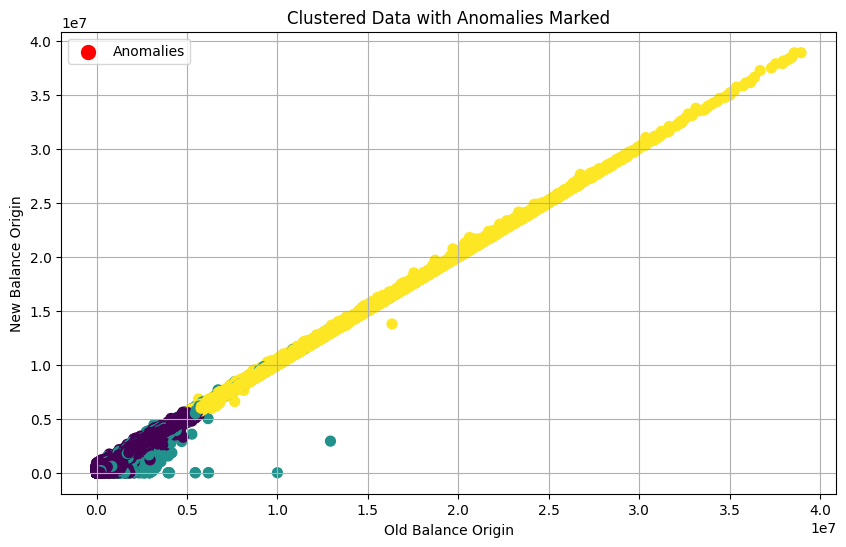

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
data.dropna(inplace=True)

# Select relevant features for clustering
X = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
kmeans.fit(X_scaled)

# Predict cluster labels
cluster_labels = kmeans.predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot the points with different colors for each cluster
plt.scatter(X['oldbalanceOrg'], X['newbalanceOrig'], c=cluster_labels, cmap='viridis', marker='o', s=50)

# Mark anomalies (outliers) in red
outliers = X[cluster_labels == -1]
plt.scatter(outliers['oldbalanceOrg'], outliers['newbalanceOrig'], color='red', marker='o', s=100, label='Anomalies')

plt.title('Clustered Data with Anomalies Marked')
plt.xlabel('Old Balance Origin')
plt.ylabel('New Balance Origin')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install -q gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.4/312.4 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.3 MB/s eta 0:00:00


In [ ]:
import joblib
joblib.dump(RF, "credit_fraud.pkl")

['credit_fraud.pkl']